# Myynnin analysointi

#### Tuodaan tarvittavat kirjastot

In [114]:
import pandas as pd
import os

In [3]:
pwd = os.getcwd()

#### Yhdistetään 12 kuukauden myynnin datat yhdeksi isoksi .csv tiedostoksi

In [16]:
path = "C:\Koodia\Oma kansio\Myynti_Data_Analysointi_Projekti\SalesAnalysis\Data - Sales_Per_Month"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Hylätään tyhjät tiedostot

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("Sales_All_2019.csv", index=False)

    

#### Lue päivitetty tiedosto

In [19]:
all_data = pd.read_csv("Sales_All_2019.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Puhdistetaan tiedosto!
Ensimmäinen askel tässä on selvittää, mitä meidän on puhdistettava. Käytännössä huomasin, että siivoan asioita tehdessäni toimintoja ja sain virheitä. Virheen perusteella päätin, miten minun tulisi puhdistaa tiedostoa.

#### Pudotetaan NaN tiedostosta

In [115]:
all_data.nan = all_data[all_data.isna().any(axis=1)]

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Kuukausi,Myynti,Kaupunki,Tunti,Minuutit,KPL
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


#### Etsitään 'Or' ja poistetaan se

In [25]:
kokeilu = all_data[all_data['Order Date'].str[:2] == 'Or']
kokeilu.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


##### Löydettiin arvot, joten palataan tiedostoon ilman 'Or' arvoja

In [26]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

##### Huomattiin että tiedostossa edelleen arvoja väärässä muodossa, nyt str halutaan int

In [29]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# Muutetaan int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])# Muutetaan float

#### Lisätään tietoja lisäsarakkeilla

#### Tehtävä 2: Lisää kuukausi sarakkeet

In [33]:
all_data['Kuukausi'] = all_data['Order Date'].str[:2]
all_data['Kuukausi'] = all_data['Kuukausi'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Kuukausi,Myynti
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,4,11.99


#### Tehtävä 3: Lisätään myynti sarake


In [31]:
all_data['Myynti'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Kuukausi,Myynti
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,4,11.99


#### Tehtävä 4: Lisätään kaupunki Sarake

In [55]:
# Käytetään .apply() funktiota
# Mahdollista myös aliohjelmilla
# Lambda funktiolla sekä x.split voidaan sarake jakaa halki ja ottaa haluttu arvo
def kaupunki(osoite):
    return osoite.split(',')[1]

def osavaltio(osoite):
    return osoite.split(',')[2].split(' ')[1]


#all_data['Kaupunki'] = all_data['Purchase Address'].apply(lambda x: kaupunki(x) + ' (' + osavaltio(x) + ')')
all_data['Kaupunki'] = all_data['Purchase Address'].apply(lambda x: f"{kaupunki(x)} ({osavaltio(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Kuukausi,Myynti,Kaupunki
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Tutkitaan dataa!

### Kysymys 1: Mikä oli paras kuukausi? Ja paljonko silloin myynti?

In [110]:
all_data['Myynti'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [111]:
all_data.groupby('Kuukausi').sum()

C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\621947607.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Kuukausi').sum()


,Quantity Ordered,Price Each,Myynti,Tunti,Minuutit,KPL
Kuukausi,,,,,,
1,10903,1811768.38,1822256.73,139485,282440,9709
2,13449,2188884.72,2202022.42,172669,354885,11975
3,17005,2791207.83,2807100.38,218969,447559,15153
4,20558,3367671.02,3390670.24,262259,544186,18279
5,18667,3135125.13,3152606.75,238780,487899,16566
6,15253,2562025.61,2577802.26,195528,402436,13554
7,16072,2632539.56,2647775.76,206169,417349,14293
8,13448,2230345.42,2244467.88,172289,353857,11961
9,13109,2084992.09,2097560.13,168513,341698,11621


range(1, 13)


C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\3388781426.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(kuukausi,all_data.groupby(['Kuukausi']).sum()['Myynti'])


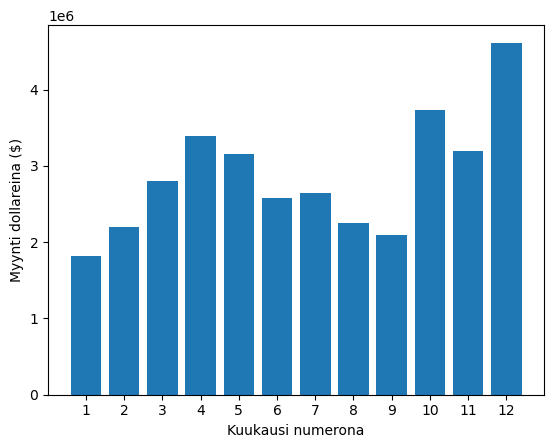

In [121]:
import matplotlib.pyplot as plt

kuukausi = range(1,13)
print(kuukausi)

plt.bar(kuukausi,all_data.groupby(['Kuukausi']).sum()['Myynti'])
plt.xticks(kuukausi)
plt.ylabel('Myynti dollareina ($)')
plt.xlabel('Kuukausi numerona')
plt.show()

#### Kysymys 1 / Vastaus : 12. kuukausi eli joulukuu oli myynnillä tuottoisin kuukausi koko vuotena, määrällä 4 613 443.34€

## _______________________________________________________________________________________________________________________________________

#### Kysymys 2 : Millä kaupungilla oli vuoden aikana suurin myynti?

In [107]:
all_data.groupby(['Kaupunki']).sum()

C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\1466614759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Kaupunki']).sum()


,Quantity Ordered,Price Each,Kuukausi,Myynti,Tunti,Minuutit,KPL
Kaupunki,,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477,44732


C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\4096252223.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(kaupungit,all_data.groupby(['Kaupunki']).sum()['Myynti'])


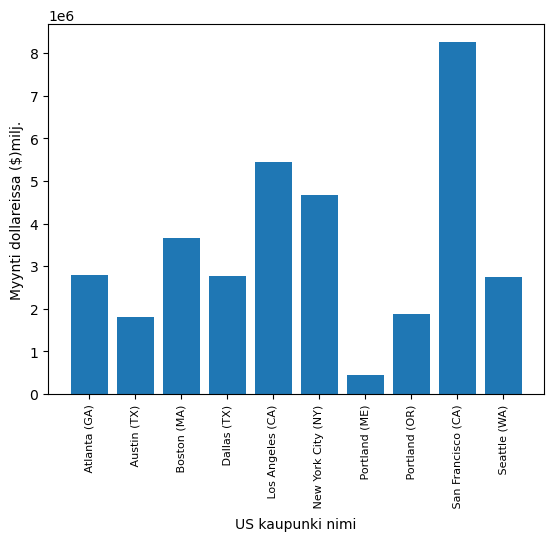

In [123]:
kaupungit = [Kaupunki for Kaupunki, df in all_data.groupby('Kaupunki')]

plt.bar(kaupungit,all_data.groupby(['Kaupunki']).sum()['Myynti'])
plt.xticks(kaupungit, rotation='vertical', size=8)
plt.ylabel('Myynti dollareissa ($)milj.')
plt.xlabel('US kaupunki nimi')
plt.show()

#### Kysymys 2 / Vastaus: Vuoden aikana suurin myynti oli kaupungilla San Francisco (CA).

## _______________________________________________________________________________________________________________________________________

#### Kysymys 3: Mihin aikaan meidän pitäisi näyttää mainoksia maksimoidaksemme todennäköisyyden, että asiakas ostaisi tuotteen?

##### Muutetaan "Order Date" muotoa datetime funktiolla

In [67]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Lisätään tunti sekä minuutti sarakkeet

In [105]:
all_data['Tunti'] = all_data['Order Date'].dt.hour
all_data['Minuutit'] = all_data['Order Date'].dt.minute
all_data['KPL'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Kuukausi,Myynti,Kaupunki,Tunti,Minuutit,KPL
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\3341571836.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  keys = [pair for pair, df in all_data.groupby(['Tunti'])]


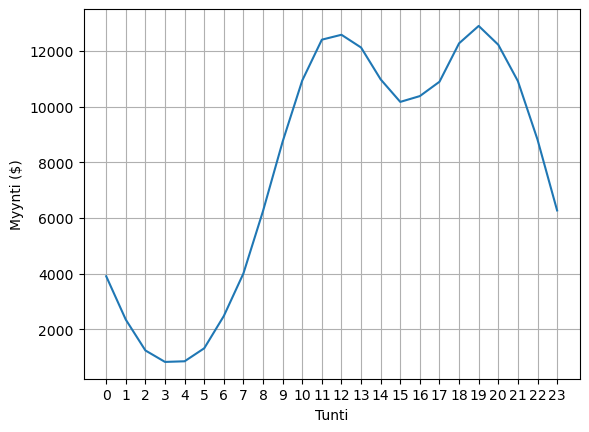

In [124]:
keys = [pair for pair, df in all_data.groupby(['Tunti'])]

plt.plot(keys, all_data.groupby(['Tunti']).count()['KPL'])
plt.xticks(keys)
plt.ylabel('Myynti ($)')
plt.xlabel('Tunti')
plt.grid()
plt.show()

#### Kysymys 3 / Vastaus:  maksimoidaksemme todennäköisyyden myynnille, kannattaisi mainoksia näyttää 11 aamupäivällä sekä 19 illalla.

## _______________________________________________________________________________________________________________________________________

#### Kysymys 4: Mitä tuotteita myydään useimmiten yhdessä?

### Huomaamme että tilauksissa, jotka osteaan yhdessä on sama tilaus numero.

In [103]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Tilaus'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Tilaus']].drop_duplicates()

C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\90571343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tilaus'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [86]:
from itertools import combinations
from collections import Counter

laskin = Counter()

for row in df['Tilaus']:
    row_list = row.split(',')
    laskin.update(Counter(combinations(row_list, 2)))

for key, value in laskin.most_common(10):
    print(key, value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


#### Kysymys 4 / Vastaus: Tuotteita "iPhone" ja "Lightning Charging Cable" myydään eniten yhdessä. Määrä 1005 kpl.

## _______________________________________________________________________________________________________________________________________

#### Kysymys 5 Mitä tuotetta myytiin eniten? Miksi luulet sen myyneen eniten?

In [87]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Kuukausi,Myynti,Kaupunki,Tunti,Minuutit,KPL
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\3193103325.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kpl_tilattu = tavara.sum()['Quantity Ordered']


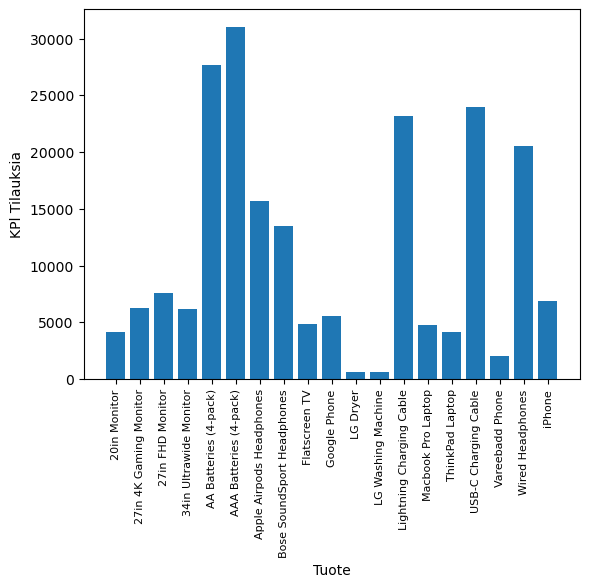

In [102]:
tavara = all_data.groupby('Product')
kpl_tilattu = tavara.sum()['Quantity Ordered']

tavarat = [tavara for tavara, df in tavara]

plt.bar(tavarat, kpl_tilattu)
plt.xticks(tavarat, rotation='vertical', size=8)
plt.ylabel('KPl Tilauksia')
plt.xlabel('Tuote')
plt.show()

C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\445459652.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hinta = all_data.groupby('Product').mean()['Price Each']
C:\Users\oulan\AppData\Local\Temp\ipykernel_9712\445459652.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(tavarat, rotation='vertical', size=8)


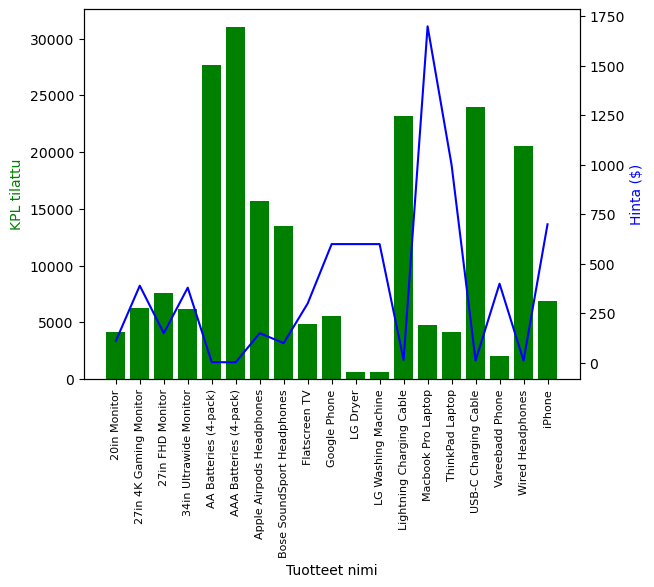

In [101]:
hinta = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(tavarat, kpl_tilattu, color='g')
ax2.plot(tavarat, hinta, color='b')

ax1.set_xlabel('Tuotteet nimi')
ax1.set_ylabel('KPL tilattu', color='g')
ax2.set_ylabel('Hinta ($)', color='b')
ax1.set_xticklabels(tavarat, rotation='vertical', size=8)

plt.show()

#### Kysymys 5 / Vastaus: Tuotetta "AA Batteries (4-pack)" myytin eniten. Määrä +30 000kpl.

#### Syy korkealle tilausmäärälle voisi olla alhainen hinta. Esim "LG Dryer" on kallis, joten tilauksia vähän.